<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## 🎯Objectives


➡️Apprendre a manipuler les donnees avec SQL!!!
SQL est plus intuitif et puissant pour filtrer, grouper, manipuler les donnees

>✔️utiliser SQL pour creer les tables de visualisation et enregistrer en une df
>utiliser les query et pd.read_sql_query(QUERY, conn)
>
>✔️Visualisation avec python (Matplotlib, seaborn...)

After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [133]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-29 22:24:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  54.8MB/s    in 2.8s    

2025-03-29 22:24:56 (54.8 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [134]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [135]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


➡️Verifier si la df est clean, sinon evaluer les besoins (duplicates, NaN, outliers, normaliation etc...)

In [6]:
total_nan = df.isnull().sum()
total_nan

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [9]:
duplicate_counts = df.duplicated(keep=False).sum()
duplicate_counts

np.int64(0)

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [136]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

DatabaseError: Execution failed on sql 'DROP TABLE "main"': disk I/O error

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [11]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [17]:
QUERY = """SELECT * FROM 'main' """
df = pd.read_sql_query(QUERY, conn)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Demo: Listing All Tables


To view the names of all tables in the database:


In [20]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [21]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [22]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


Voir le schema de la db - une seule table 'main' a priori

## Hands-on Lab


In [ ]:
import sqlite3
# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


➡️procedure :

1/observer la variable dans sql

2/manipuler les donnees pour creer la df a visualiser avec les colonnes requises

3/filtrer la df pour enlever les NaN puis visualiser l'histogramme dans python plt

In [127]:
#Creer une df filtree qui compile les reponses par CompTotal et qui exclue les outliers
QUERY = """
SELECT CompTotal, COUNT(ResponseId)  FROM main WHERE CompTotal < 250000 +1.5*(250000-60000)
GROUP BY CompTotal """

df_comptotal_hist = pd.read_sql_query(QUERY, conn)

,CompTotal,COUNT(ResponseId)
0,0.0,127
1,1.0,12
2,2.0,4
3,3.0,1
4,4.0,4
...,...,...
2197,530000.0,11
2198,530705.0,1
2199,531000.0,1
2200,533000.0,2


In [137]:
#filter la df sans les NaN
df_comptotal_hist_sans_nan = df_comptotal_hist.dropna()
# Filtrer uniquement les valeurs dans une plage raisonnable
filtered_data_hist = df_comptotal_hist_sans_nan[df_comptotal_hist_sans_nan['CompTotal'] <= 500000]

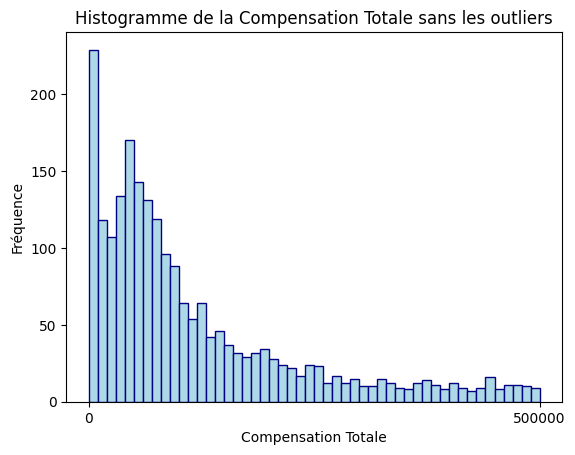

In [139]:
#visualiser l'histogramme avec la df creee dans SQLite
# Histogramme sans valeurs aberrantes
plt.hist(filtered_data_hist['CompTotal'], bins=50, color= 'lightblue', edgecolor='navy')
plt.title('Histogramme de la Compensation Totale sans les outliers')
plt.xlabel('Compensation Totale')
plt.xticks([0, 500000])
plt.ylabel('Fréquence')
plt.show()

**Box Plots**

Plot a box plot of Age.


In [44]:
Query_age ="""
SELECT DISTINCT Age FROM main """ 
pd.read_sql_query(Query_age,conn)

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,25-34 years old
5,55-64 years old
6,Prefer not to say
7,65 years or older


✨Pas de valeur NaN, bonne nouvelle!✨

In [52]:
#step 1 : decategoriser la variable Age pour transformer en variable continue et faire le boxplot
# Définir une correspondance entre catégories et âges moyens
age_mapping = {
    'under 18 years old': 16,   # Moyenne estimée pour "under 18"
    '18-24 years old': 20,   # Moyenne estimée pour "18-24"
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old' : 50, 
    '55-64 years old' : 60, 
    '65 years or older' : 65
}

# Remplacer les catégories par leurs valeurs moyennes
df['Age_qualitative'] = df['Age'].map(age_mapping)  #erreur dans le nom :(!!!!!
df.rename(columns={"Age_qualitative": "Age_quantitative"}, inplace=True)

In [54]:
df['Age_quantitative'].unique()

array([nan, 40., 50., 20., 30., 60., 65.])

In [55]:
df['Age_quantitative'].describe()

count    62547.000000
mean        33.800182
std         11.141149
min         20.000000
25%         30.000000
50%         30.000000
75%         40.000000
max         65.000000
Name: Age_quantitative, dtype: float64

In [56]:
#remplacer les NaN par la moyenne
age_mean = df['Age_quantitative'].mean()
df['Age_quantitative']=df['Age_quantitative'].fillna(age_mean)

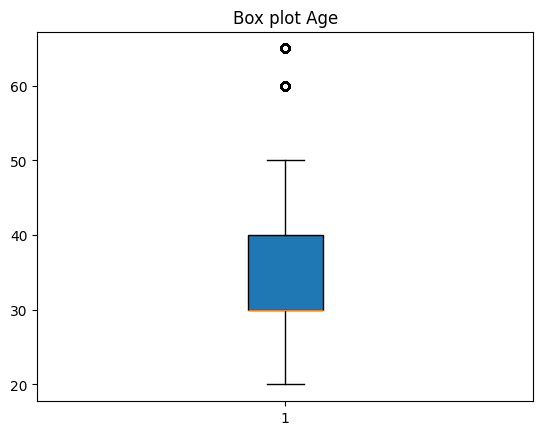

In [61]:
#step 2 : boxplot
plt.boxplot(x=df['Age_quantitative'], patch_artist=True) 
plt.title('Box plot Age') 
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [62]:
QUERY = """ 
SELECT Age, WorkExp FROM main LIMIT 5"""
pd.read_sql_query(QUERY,conn)

,Age,WorkExp
0,Under 18 years old,NaN
1,35-44 years old,17.0
2,45-54 years old,NaN
3,18-24 years old,NaN
4,18-24 years old,NaN


In [ ]:
#utiliser Age_quantitative et filtrer WorkExp

In [66]:
print(df['WorkExp'].isnull().sum())

35779


In [63]:
df['WorkExp'].unique()

array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])

In [64]:
df['WorkExp'].dtype

dtype('float64')

In [65]:
df['WorkExp'].describe()

count    29658.000000
mean        11.466957
std          9.168709
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64

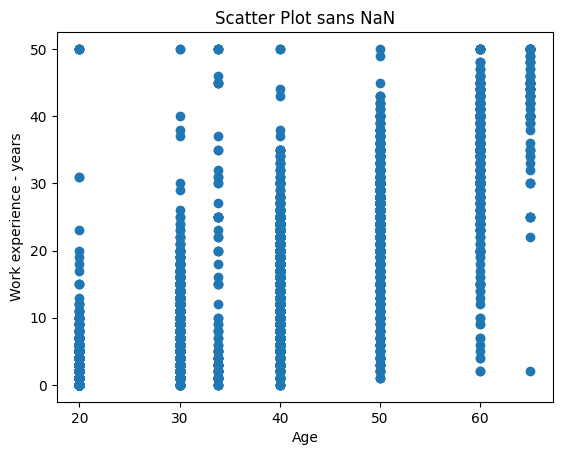

In [69]:
# Filtrer les données pour supprimer les lignes contenant NaN
valid_data = df.dropna(subset=['Age_quantitative', 'WorkExp'])

# Scatter plot avec données valides
plt.scatter(valid_data['Age_quantitative'], valid_data['WorkExp'])
plt.xlabel('Age')
plt.ylabel('Work experience - years')
plt.title('Scatter Plot sans NaN')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [72]:
#visualiser les 2 variable
Query = """ SELECT TimeSearching, Frustration FROM main WHERE TimeSearching !='None' LIMIT 5""" 
pd.read_sql_query(Query,conn)

,TimeSearching,Frustration
0,30-60 minutes a day,Amount of technical debt;Number of software to...
1,30-60 minutes a day,Amount of technical debt;Complexity of tech st...
2,60-120 minutes a day,Amount of technical debt;Complexity of tech st...
3,15-30 minutes a day,Amount of technical debt;Tracking my work;Comp...
4,Less than 15 minutes a day,Number of software tools in use;Tracking my wo...


In [82]:
#decategoriser TimeSearching
df['TimeSearching'].unique()

array([nan, '30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [83]:
# Définir une correspondance entre catégories et TimeSearching
timesearching_mapping = {
    '30-60 minutes a day': 45,   # Moyenne estimée pour 30-60 minutes
    '60-120 minutes a day': 90,   
    '15-30 minutes a day': 22.5,
    'Less than 15 minutes a day': 10,
    'Over 120 minutes a day' : 120,
    }

# Remplacer les catégories par leurs valeurs moyennes
df['TimeSearching_quantitative'] = df['TimeSearching'].map(timesearching_mapping)
df['TimeSearching_quantitative'].unique()

array([  nan,  45. ,  90. ,  22.5,  10. , 120. ])

In [73]:
#explorer mieux la variable Frustration
Query_frustration = """
SELECT DISTINCT Frustration FROm main """ 
pd.read_sql_query(Query_frustration,conn)

,Frustration
0,None
1,Amount of technical debt;Number of software to...
2,Amount of technical debt;Complexity of tech st...
3,Amount of technical debt;Complexity of tech st...
4,Amount of technical debt;Tracking my work;Comp...
...,...
950,Tracking my work;Reliability of tools/systems ...
951,Amount of technical debt;Number of software to...
952,Number of software tools in use;Tracking my wo...
953,Amount of technical debt;Number of software to...


💡les entrees dans la variable Frustration sont separees par ';'
s'agissant d'un sondage, il y a surement une selection des cas de frustration, donc le nombre de
sequences separees par ';' indique un score de frustration ! Le score permet de tranformer la variable 
en variable continue !

In [75]:
df['Frustration'].dtype

dtype('O')

In [76]:
print(df['Frustration'].isnull().sum())

37186


In [77]:
# Remplace NaN par chaîne vide
df['Frustration'] = df['Frustration'].fillna('')  
# Créer un score basé sur le nombre de sections séparées par ';'
df['Frustration_Score'] = df['Frustration'].str.split(';').apply(len)
# Afficher les premiers résultats pour vérifier
print(df[['Frustration', 'Frustration_Score']].head())

  Frustration  Frustration_Score
0                              1
1                              1
2                              1
3                              1
4                              1


In [81]:
df['Frustration_Score'].unique()

array([ 1,  4,  2,  6,  3,  5,  9,  7,  8, 10, 11])

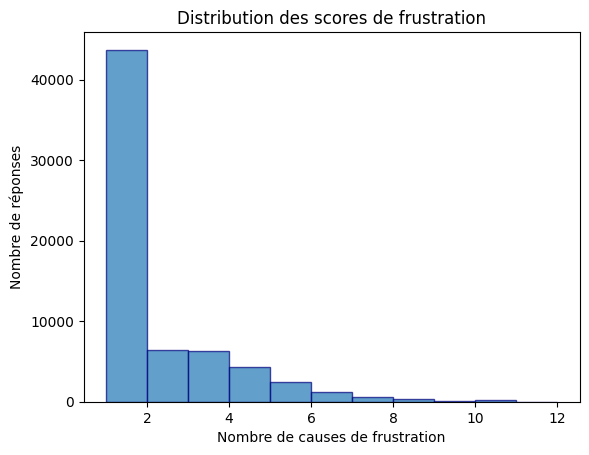

In [80]:
# Visualiser la distribution des scores
import matplotlib.pyplot as plt
plt.hist(df['Frustration_Score'], bins=range(1, df['Frustration_Score'].max() + 2), alpha=0.7, align='mid',edgecolor='navy')
plt.title("Distribution des scores de frustration")
plt.xlabel("Nombre de causes de frustration")
plt.ylabel("Nombre de réponses")
plt.show()

/tmp/ipykernel_300/1496048573.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Âge (taille des bulles)', scatterpoints=1, frameon=True, labelspacing=1)


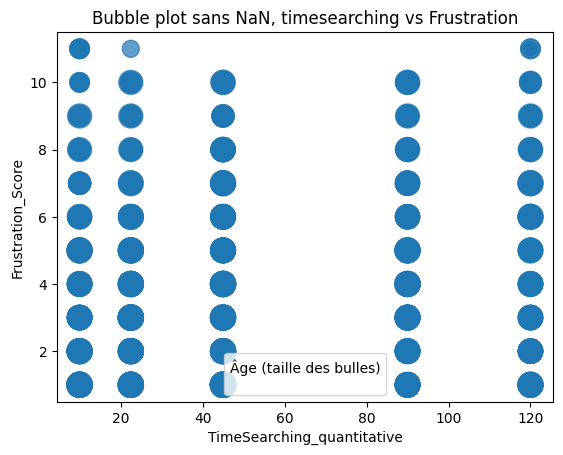

In [93]:
#bubble plot en filtrant les NaN
# Filtrer les données pour supprimer les lignes contenant NaN
data_bubble = df.dropna(subset=['TimeSearching_quantitative','Frustration_Score','Age_quantitative'])
# Scatter plot avec données valides
plt.scatter(data_bubble['TimeSearching_quantitative'], data_bubble['Frustration_Score'], 
            s=data_bubble['Age_quantitative']*5, alpha=0.7)

# Ajouter une légende basée sur des âges réels
#for age in [18, 30, 50, 70]:  # Exemple d'âges représentatifs
    #plt.scatter([], [], s=age*5, alpha=0.5, c='blue', label=f'Âge: {age}')
    
# Ajouter une légende
plt.legend(title='Âge (taille des bulles)', scatterpoints=1, frameon=True, labelspacing=1)
plt.xlabel('TimeSearching_quantitative')
plt.ylabel('Frustration_Score')
plt.title('Bubble plot sans NaN, timesearching vs Frustration')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [96]:
Query = """  
SELECT DISTINCT DatabaseWantToWorkWith FROM main LIMIT 5 """ 
pd.read_sql_query(Query,conn)

,DatabaseWantToWorkWith
0,None
1,PostgreSQL
2,Firebase Realtime Database
3,MongoDB;MySQL;PostgreSQL
4,PostgreSQL;SQLite


In [97]:
#Étape 1 : Diviser les chaînes en listes
df['DB_WTWW'] = df['DatabaseWantToWorkWith'].str.split(';')

# Étape 2 : Exploser la colonne
exploded = df.explode('DB_WTWW')

# Étape 3 : Compter les occurrences
counts = exploded['DB_WTWW'].value_counts()

# Étape 4 : Identifier le top 5
top_5 = counts.head(5)

# Afficher le résultat
print(top_5)

DB_WTWW
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


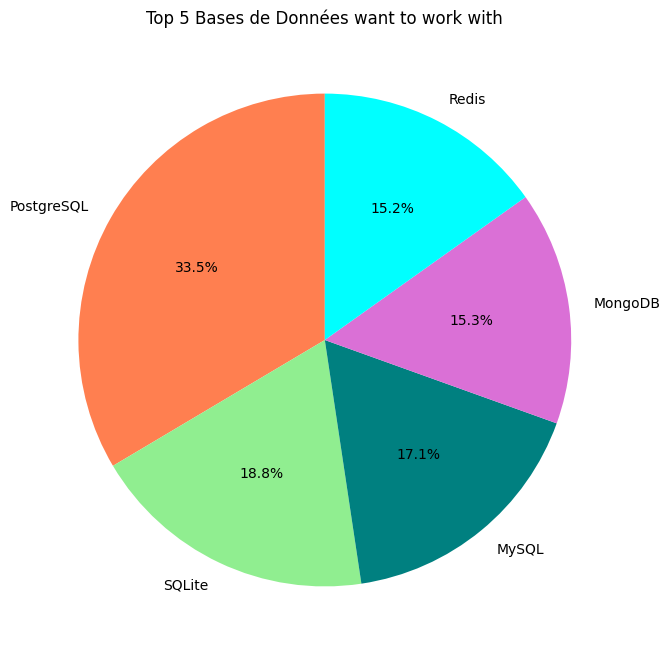

In [99]:
# Tracer le pie chart
plt.figure(figsize=(8, 8))  # Taille de la figure
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen', 'teal', 'orchid', 'aqua'])

# Ajout de titre
plt.title('Top 5 Bases de Données want to work with')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Categorie group 30 to 35 does not exist: alors on va prendre 25-34 :)

In [103]:
query = """ 
SELECT TimeSearching, TimeAnswering, Age FROM main WHERE TimeSearching != 'None' LIMIT 5""" 
pd.read_sql_query(query,conn)

,TimeSearching,TimeAnswering,Age
0,30-60 minutes a day,60-120 minutes a day,35-44 years old
1,30-60 minutes a day,15-30 minutes a day,35-44 years old
2,60-120 minutes a day,60-120 minutes a day,45-54 years old
3,15-30 minutes a day,30-60 minutes a day,25-34 years old
4,Less than 15 minutes a day,15-30 minutes a day,25-34 years old


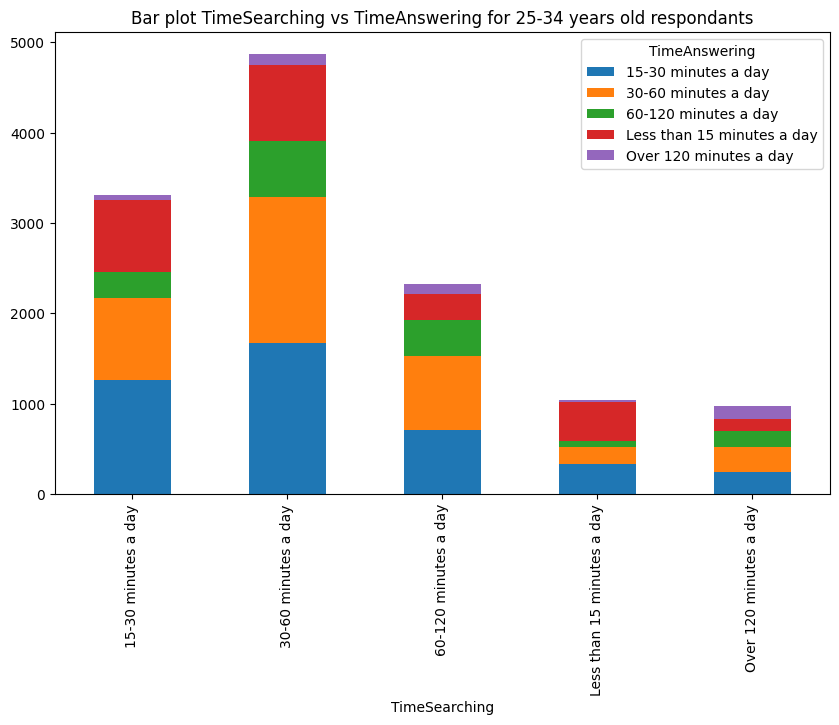

In [105]:
# Étape 1 : Filtrer les données par catégorie d'âge
filtered_df = df[df['Age'] == '25-34 years old']  

# Étape 2 : Préparer les données pour le bar plot empilé
stacked_data = filtered_df.groupby(['TimeSearching', 'TimeAnswering']).size().unstack(fill_value=0)

# Étape 3 : Tracer le bar plot empilé
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Bar plot TimeSearching vs TimeAnswering for 25-34 years old respondants') 
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


➡️Utiliser les 2 categories 45-54 et 55-64 pour ne pas arbitrairement prendre une % des 55-64 
pour creer un groupe artificiel 45-60 ... la plage devient donc 45-64 !

Cette tache ne fait pas de sens...un line plot avec l'age en categorie...
Ce sera un line plot avec 2 points :)

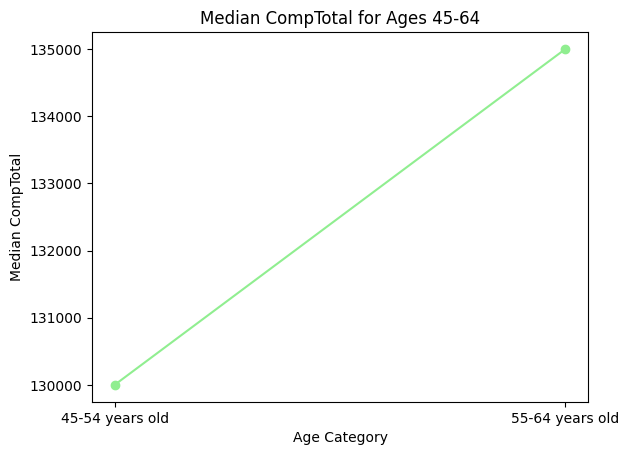

In [107]:
# Etape 1 : Filtrer les catégories d'âge 45-64
filtered_df = df[df['Age'].isin(['45-54 years old', '55-64 years old'])]

# Étape 2 : Calculer la médiane de CompTotal par catégorie d'âge
grouped_median = filtered_df.groupby('Age')['CompTotal'].median().reset_index()

# Étape 3 : Tracer le line plot
plt.plot(grouped_median['Age'], grouped_median['CompTotal'], marker='o', color='lightgreen')

# Ajouter des titres et étiquettes
plt.title('Median CompTotal for Ages 45-64')
plt.xlabel('Age Category')
plt.ylabel('Median CompTotal')
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [108]:
Query = """ SELECT MainBranch FROM main LIMIT 5""" 
pd.read_sql_query(Query,conn)

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am learning to code
4,I am a developer by profession


In [109]:
Query = """ SELECT DISTINCT MainBranch FROM main """ 
pd.read_sql_query(Query,conn)

,MainBranch
0,I am a developer by profession
1,I am learning to code
2,I code primarily as a hobby
3,"I am not primarily a developer, but I write co..."
4,"I used to be a developer by profession, but no..."


In [118]:
Query = """ SELECT MainBranch, COUNT(ResponseId) FROM main GROUP BY MainBranch """ 
pd.read_sql_query(Query,conn)

,MainBranch,COUNT(ResponseId)
0,I am a developer by profession,50207
1,I am learning to code,3875
2,"I am not primarily a developer, but I write co...",6511
3,I code primarily as a hobby,3334
4,"I used to be a developer by profession, but no...",1510


In [117]:
#creer la df
Query = """ SELECT MainBranch, COUNT(ResponseId) FROM main GROUP BY MainBranch """ 
df_mainbranch_barchart = pd.read_sql_query(Query,conn)

/tmp/ipykernel_300/2142612933.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Ajuste l'espace pour éviter le chevauchement


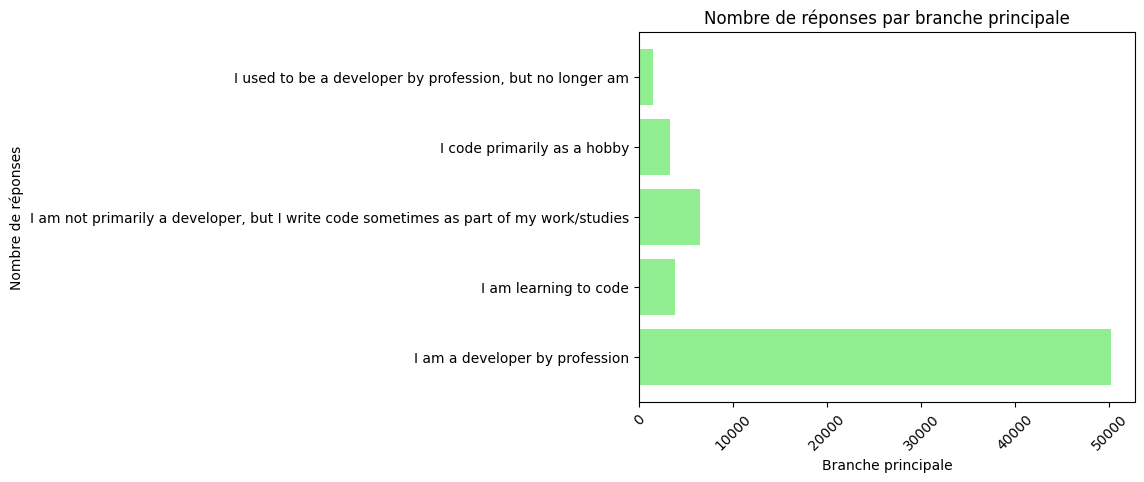

In [119]:
#bar plot
plt.barh(df_mainbranch_barchart['MainBranch'], df_mainbranch_barchart['COUNT(ResponseId)'], color='lightgreen')

# Ajouter un titre et des étiquettes aux axes
plt.title('Nombre de réponses par branche principale')
plt.xlabel('Branche principale')
plt.ylabel('Nombre de réponses')

# Afficher le graphique
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.tight_layout()  # Ajuste l'espace pour éviter le chevauchement
plt.show()         

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
